In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

In [70]:
df = pd.read_csv('dielectron.csv')
df.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [71]:
df.drop('Run', axis=1, inplace=True)
df.drop('Event', axis=1, inplace=True)
df.head()

,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [72]:
df.dropna(inplace = True)

In [73]:
y = df['M']
X = df.drop('M', axis=1)

In [74]:
X = StandardScaler().fit_transform(X)
#y = StandardScaler().fit_transform(y.values.reshape(-1, 1))

In [75]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=90125)

In [76]:
model = LGBMRegressor(random_state=91025).fit(train_X, train_y)
pred_y = model.predict(test_X)
model.score(test_X, test_y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3576
[LightGBM] [Info] Number of data points in the train set: 79932, number of used features: 16
[LightGBM] [Info] Start training from score 30.099905


0.9589533066072027

In [78]:
rmse = np.sqrt(mean_squared_error(test_y, pred_y))
print("RMSE test: %f" % (rmse))
mae = mean_absolute_error(test_y, pred_y)
print("MAE:", mae)

RMSE test: 5.072263
MAE: 3.5690895375519363


In [68]:
test_y = np.array(test_y).ravel()  # Ensure test_y is 1-dimensional
pred_y = np.array(pred_y).ravel()  # Ensure pred_y is 1-dimensional

test_y_df = pd.DataFrame({'Actual_Value': test_y})
pred_y_df = pd.DataFrame({'Predicted_Value': pred_y})
result_df = pd.concat([test_y_df, pred_y_df], axis=1)
result_df

,Actual_Value,Predicted_Value
0,25.64920,25.897441
1,21.69630,35.997930
2,7.22472,14.330742
3,30.98740,30.546839
4,41.47520,44.662653
...,...,...
19978,15.44750,14.818975
19979,54.42620,50.833211
19980,28.41820,23.545340
19981,21.96070,16.858054


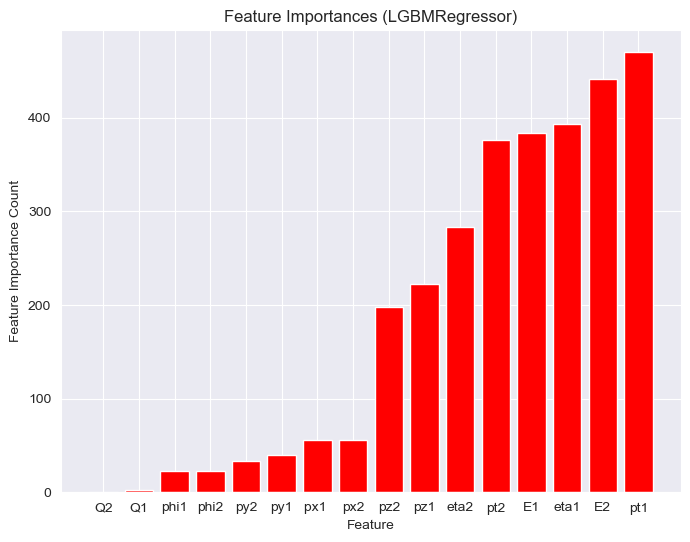

In [10]:
feature_importances = model.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='red')
plt.xlabel('Feature')
plt.ylabel('Feature Importance Count')
plt.title('Feature Importances (LGBMRegressor)')
plt.show()